In [1]:
import numpy as np 
import tensorflow as tf
import os 
import sys 
main_pth = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/'
sys.path.append(main_pth)
os.chdir(main_pth)
from LOO_nested_CV_model import build_model


model_name = 'gnn_transformer'
config_file_name = 'pretreatment_response'
msg = 'loocv_v1'
TrainModel = build_model(model_name, config_file_name,msg)


2024-04-05 11:48:39.660031: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-05 11:48:39.679679: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:7704] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 11:48:39.679701: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 11:48:39.679710: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1520] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-05 11:48:39.684200: I tensorflow/core/platform/cpu_feature_g

Sorted indices: [0, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59, 60, 61, 62, 30, 31, 28, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 29, 14, 13, 15, 27, 26, 25, 24, 23, 22, 63, 19, 18, 17, 16, 21, 45, 20, 56, 4, 54] Sorted values: [4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
 4.  4.  4.  4.  4.  4.2 4.2 4.2 4.2 4.2]
[4.  4.  4.  4.  4.2 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
 4.  4.  4.2 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.2 4.  4.  4.  4.  4.  4.  4.  4.
 4.2 4.  4.2 4.  4.  4.  4.  4.  4.  4. ]
loo_array [0, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59, 60, 61, 62, 30, 31, 28, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 29, 14, 13, 15, 27, 26, 25, 24, 

2024-04-05 11:48:40.691870: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-05 11:48:40.691965: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-05 11:48:40.693822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 52, 2500, 1)]        0         []                            
                                                                                                  
 tf.__operators__.getitem (  (None, 52, 2500)             0         ['input_3[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 input_1 (InputLayer)        [(None, 52, 52)]             0         []                            
                                                                                                  
 tf.__operators__.getitem_1  (None, 52, 2500)             0         ['input_3[0][0]']         

In [2]:
from utils.utils_mine import stratified_LOO_nested_CV

data = TrainModel.data
label = TrainModel.label
adj = TrainModel.adj
current_loo = 0
k = 0
num_of_k_fold = 5
classifier = TrainModel.model
X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test = stratified_LOO_nested_CV(data, label, k=k, num_of_k_fold=num_of_k_fold, current_loo=current_loo, adj=adj)

print(f'X_train: {X_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'X_test: {X_test.shape}')

X_train: (52, 52, 2500)
X_val: (11, 52, 2500)
X_test: (1, 52, 2500)


In [19]:
import shap
def compute_data_metrics(classifier, input_data, input_adj, y_true):
    # Assuming the TensorFlow  is stored in the variable `model`
    y_train_pred = classifier.model.predict([input_data, input_adj])
    y_train_pred_argmax = np.argmax(y_train_pred, axis=1)
    y_train_true = np.argmax(y_true, axis=1)
    from utils.utils_mine import get_metrics
    return get_metrics(y_train_pred_argmax, y_train_true)

all_subjects_shap = []
for subject in range(X_train.shape[0]):
    for k_fold in range(num_of_k_fold):
        X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test = stratified_LOO_nested_CV(data, label, k=k_fold, num_of_k_fold=num_of_k_fold, current_loo=subject, adj=adj)
        X_train = X_train[..., np.newaxis]
        X_test = X_test[..., np.newaxis]
        checkpoint_path = f'results/gnn_transformer/prognosis/pretreatment_response/loocv_v1l1_rate_0.01_l2_rate_0.01_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/LOO_{subject}/stratified_nested_5_CV_fold-{k_fold}/fold-best-checkpoint'
        classifier.model.load_weights(checkpoint_path)

        
        # NOTE TO DO: why the train metrics are very bad? see sub-0 fold-0/1 
        # train_metrics = compute_data_metrics(classifier, X_train, adj_train, Y_train)
        # val_metrics = compute_data_metrics(classifier, X_val, adj_val, Y_val)
        # print(f"sub - {subject} - fold - {k_fold} - train metrics - {train_metrics}")
        # print(f"sub - {subject} - fold - {k_fold} - val metrics - {val_metrics}")
        
        
        
        explainer = shap.GradientExplainer(classifier.model, [X_train, adj_train])
        shap_values, _ = explainer.shap_values([X_test, adj_test])
        all_subjects_shap.append(shap_values)


In [27]:
tmp = all_subjects_shap.copy()
shap_values_v1 = np.array(tmp)
print(shap_values_v1.shape)

shap_values_v1 = np.squeeze(shap_values_v1)
shap_values_v1 = np.mean(shap_values_v1, axis=0)[..., 1]
print(shap_values_v1.shape)


(260, 1, 52, 2500, 1, 2)
(52, 2500)


<BarContainer object of 52 artists>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

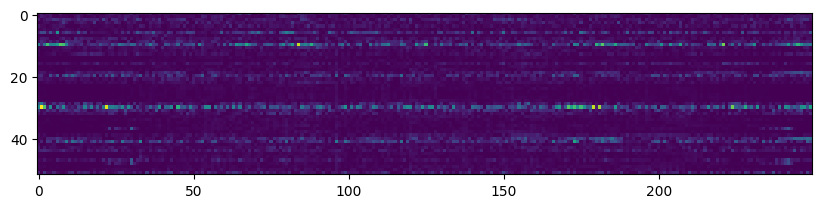

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

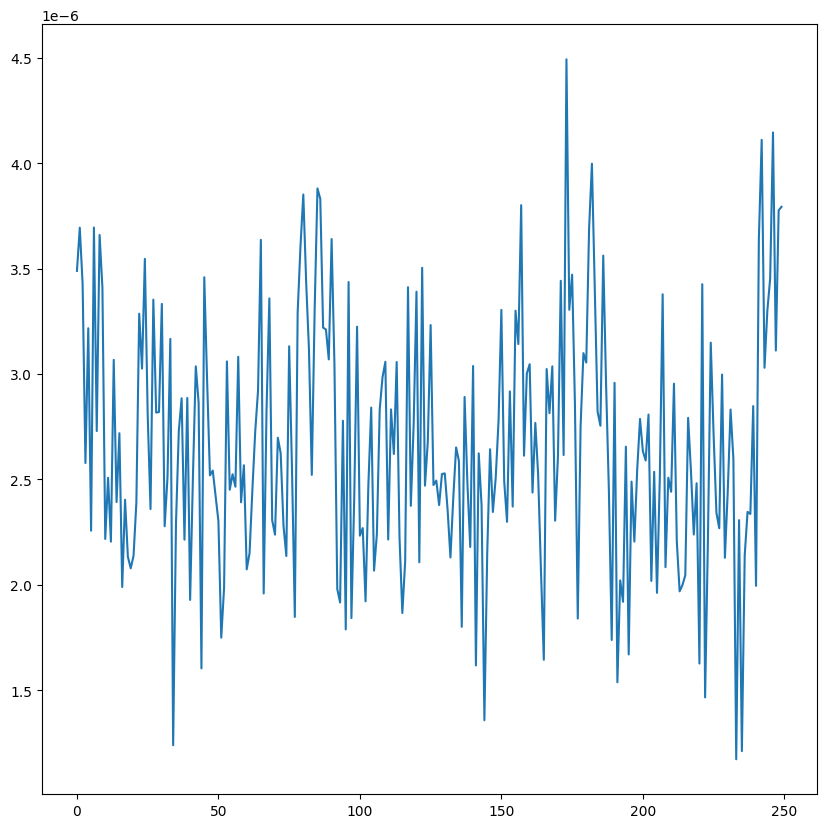

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

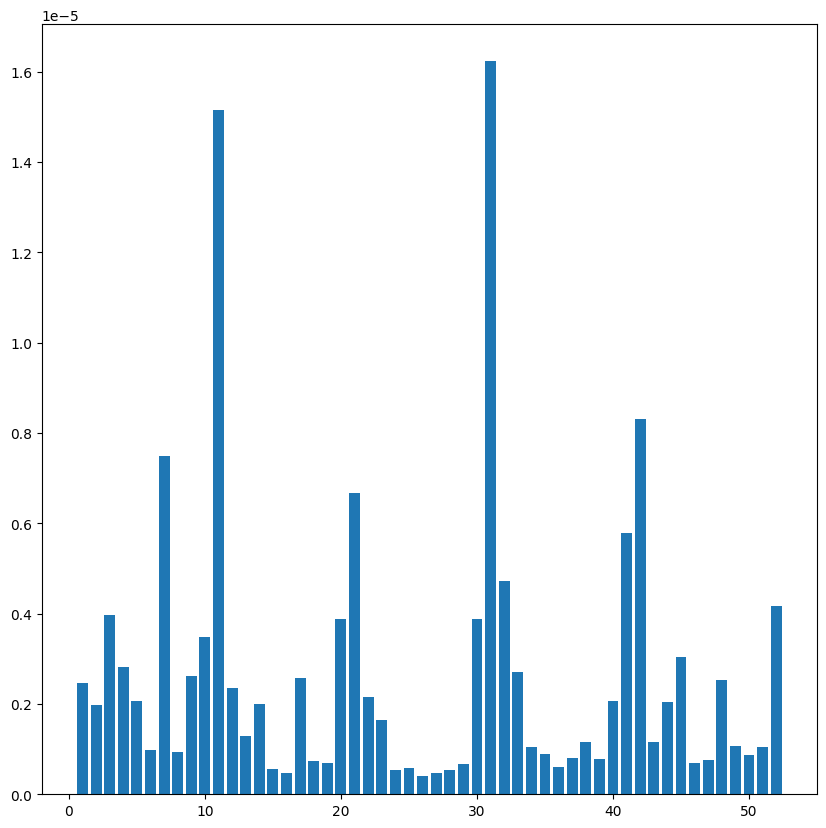

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
val = shap_values_v1.copy()

val = val.reshape(52, 250,10)
val = np.mean(val, axis=2)
val = np.abs(val)

# plot the SHAP values
plt.figure(figsize=(10, 10))
plt.imshow(val, cmap='viridis')


mean_0_val = np.mean(val, axis=0)
plt.figure(figsize=(10, 10))
plt.plot(mean_0_val)



mean_1_val = np.mean(val, axis=1)
plt.figure(figsize=(10, 10))
plt.bar(np.arange(1,53),mean_1_val)